# **Importação, tratamento e manipulação inicial dos dados:**
Iniciamos nosso projeto realizando as importações necessárias. Aqui estamos trazendo bibliotecas que nos permitem manipular dados e criar gráficos, além de conectar ao Google Drive para acessar os arquivos CSV com as denúncias.

In [3]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import re
from google.colab import drive
from google.colab import files


Montamos o Google Drive para acessar os arquivos de dados; Ao montar o Google Drive, nós garantimos acesso aos arquivos diretamente da nuvem, o que facilita o trabalho com grandes datasets. Nesse mesmo bloco de código nos preocupamos em definir os caminhos para cada arquivo CSV correspondente aos semestres de 2020 a 2023, uma vez que essa etapa organiza os arquivos que vamos utilizar, o que facilita o carregamento futuro.

In [2]:
drive.mount('/content/drive')

caminho_2020_1 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-primeiro-semestre-2020.csv'
caminho_2020_2 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-segundo-semestre-2020.csv'
caminho_2021_1 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-primeiro-semestre-2021.csv'
caminho_2021_2 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-segundo-semestre-2021.csv'
caminho_2022_1 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-primeiro-semestre-2022.csv'
caminho_2022_2 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-segundo-semestre-2022.csv'
caminho_2023_1 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-primeiro-semestre-2023 (1).csv'
caminho_2023_2 = '/content/drive/MyDrive/Projeto_final_ON34/disque100-segundo-semestre-2023.csv'

primeiro_semestre_2020 = pd.read_csv(caminho_2020_1, sep=';')
segundo_semestre_2020 = pd.read_csv(caminho_2020_2, sep=';')
primeiro_semestre_2021 = pd.read_csv(caminho_2021_1, sep=';')
segundo_semestre_2021 = pd.read_csv(caminho_2021_2, sep=';')
primeiro_semestre_2022 = pd.read_csv(caminho_2022_1, sep=';')
segundo_semestre_2022 = pd.read_csv(caminho_2022_2, sep=';')
primeiro_semestre_2023 = pd.read_csv(caminho_2023_1, sep=';')
segundo_semestre_2023 = pd.read_csv(caminho_2023_2, sep=';')




Mounted at /content/drive


<ipython-input-2-74f8ce3268ac>:17: DtypeWarning: Columns (20,21,22,25,41,42,43,46,52,56) have mixed types. Specify dtype option on import or set low_memory=False.
  segundo_semestre_2022 = pd.read_csv(caminho_2022_2, sep=';')
<ipython-input-2-74f8ce3268ac>:18: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  primeiro_semestre_2023 = pd.read_csv(caminho_2023_1, sep=';')


 Inserimos uma coluna com o ano em cada dataset, facilitando a análise temporal; Aqui criamos uma nova coluna chamada 'ano' para sabermos de qual ano cada registro de denúncia pertence, o que nos ajudará a analisar a variação das denúncias ao longo do tempo.

In [4]:
primeiro_semestre_2020['ano'] = 2020

In [5]:
segundo_semestre_2020['ano'] = 2020

In [6]:
primeiro_semestre_2021['ano'] = 2021


In [7]:
segundo_semestre_2021['ano'] = 2021


In [8]:
primeiro_semestre_2022['ano'] = 2022


In [9]:
segundo_semestre_2022['ano'] = 2022

In [10]:
primeiro_semestre_2023['ano'] = 2023


In [11]:
segundo_semestre_2023['ano'] = 2023

Para nos certificarmos de que os arquivos estão sendo carregados corretamentes e facilitar nossa análise, concatenamos os DataFrames de cada semestre, criando um dataset consolidado, com todas as denúncias entre 2020 e 2023.

In [12]:
historico_denuncias_bruto =  pd.concat([primeiro_semestre_2020, segundo_semestre_2020, primeiro_semestre_2021, segundo_semestre_2021, primeiro_semestre_2022, segundo_semestre_2022, primeiro_semestre_2023, segundo_semestre_2023])
historico_denuncias_bruto['ano'].unique()

array([2020, 2021, 2022, 2023])

Já pensando na resposta da primeira pergunta, resolvemos verificar quais religiões estão sendo capturadas nos dados, para conferir se temos dados somente de vítimas de religiões de matriz afro, ou se precisamos filtrar mais.

In [ ]:
historico_denuncias_bruto['Religião da vítima'].unique()

array([nan, 'N/D', 'CATÓLICA APOSTÓLICA ROMANA', 'ESPIRITISMO',
       'EVANGELHO QUADRANGULAR', 'IGREJA DEUS É AMOR',
       'ADVENTISTA DO SÉTIMO DIA', 'CONGREGAÇÃO CRISTÃ NO BRASIL',
       'ASSEMBLEIA DE DEUS', 'OUTROS PENTECOSTAIS/NEOPENTECOSTAIS',
       'SEM RELIGIÃO', 'PRESBITERIANA', 'OUTRAS RELIGIÕES', 'BATISTA',
       'CATÓLICA ORTODOXA', 'CANDOMBLÉ', 'BUDISMO', 'UMBANDA', 'LUTERANA',
       'UNIVERSAL DO REINO DE DEUS', 'TESTEMUNHAS DE JEOVÁ', 'MESSIÂNICA',
       'OUTRAS DE MATRIZ AFRICANA', 'BAHAÍSMO', 'JUDAÍSMO', 'METODISTA',
       'TAOÍSMO', 'MÓRMONS', 'SEICHO-NO-IÊ', 'ISLAMISMO', 'HARE',
       'CRENÇAS INDÍGENAS', 'HINDUÍSMO', 'XINTOÍSMO', 'KRISHNA',
       'UMBANDA E CANDOMBLÉ'], dtype=object)

Como conferimos, há mais religiões sendo puxadas do que a que pretendemos tratar. Aqui, vamos isolar os casos que realmente envolvem religiões de matriz afro, nosso foco. Esse filtro garante que as análises sejam direcionadas para entender o cenário específico das religiões afro-brasileiras.

In [13]:
historico_denuncias = historico_denuncias_bruto.loc[~historico_denuncias_bruto['Religião da vítima'].isin(['ESPIRITISMO', 'BATISTA', 'N/D', 'CATÓLICA APOSTÓLICA ROMANA','EVANGELHO QUADRANGULAR', 'IGREJA DEUS É AMOR','ADVENTISTA DO SÉTIMO DIA', 'CONGREGAÇÃO CRISTÃ NO BRASIL','ASSEMBLEIA DE DEUS', 'OUTROS PENTECOSTAIS/NEOPENTECOSTAIS','SEM RELIGIÃO', 'PRESBITERIANA', 'OUTRAS RELIGIÕES', 'BATISTA','CATÓLICA ORTODOXA','BUDISMO', 'LUTERANA', 'UNIVERSAL DO REINO DE DEUS', 'TESTEMUNHAS DE JEOVÁ', 'MESSIÂNICA', 'BAHAÍSMO', 'JUDAÍSMO', 'METODISTA', 'TAOÍSMO', 'MÓRMONS', 'SEICHO-NO-IÊ', 'ISLAMISMO', 'HARE',  'CRENÇAS INDÍGENAS', 'HINDUÍSMO', 'XINTOÍSMO', 'KRISHNA'])]
historico_denuncias['Religião da vítima'].unique()

array([nan, 'CANDOMBLÉ', 'UMBANDA', 'OUTRAS DE MATRIZ AFRICANA',
       'UMBANDA E CANDOMBLÉ'], dtype=object)

Em seguida, visualizamos os dados faltantes (vazios) em cada coluna, ordenando para facilitar a análise. Aqui vemos se há dados faltantes em algumas colunas. Isso é importante porque, ao fazer análises, dados faltantes podem distorcer os resultados, e precisamos entender o que pode ser feito (como remover ou tratar esses valores).

In [ ]:
historico_denuncias.isnull().sum().sort_values(ascending=True)

,0
ano,0
Denunciante,303
UF,1514
Município,2168
Canal_de_atendimento,8474
...,...
Vínculo Órgão\PJ do suspeito,2458275
Deficiência_relacionada_a_doença_rara,2458376
Deficiência_relacionada_a_doença_rara_suspeito,2458379
Grau_de_instrução_do_suspeito,2458393


As colunas selecionadas são as que vão nos ajudar a responder perguntas-chave do projeto, como:
- Como a quantidade de denúncias variou ao longo dos anos?;
- Quais estados apresentam a maior quantidade de denúncias?;
- Qual o perfil demográfico das vítimas?;

Após conferir quais as colunas disponíveis, separamos aquelas que poderiam responder às perguntas, como é possível ver em seguida:

*   Coluna selecionadas para a pergunta 1 = Data_de_cadastro;
*   Colunas selecionadas para a pergunta 2 = UF, Município;
* Colunas selecionadas para a pergunta 3  = Gênero_da_vítima, Faixa_etária_da_vítima, Raça_Cor_da_vítima.


#**Pergunta 1: Como a quantidade de denúncias variou ao longo dos anos?**
Agora vamos analisar a quantidade de denúncias por ano. Isso vai nos ajudar a identificar tendências. Será que as denúncias aumentaram ou diminuíram com o passar dos anos?

In [ ]:
denuncias_por_ano = historico_denuncias.groupby('ano').size().reset_index(name='Quantidade de Denúncias')
print(denuncias_por_ano)

    ano  Quantidade de Denúncias
0  2020                   138440
1  2021                     4054
2  2022                   941829
3  2023                  1374073


Analisando a variação por ano, conseguimos ver se o problema de perseguição às religiões afro-brasileiras está piorando ou se as políticas públicas e a conscientização da sociedade estão tendo algum efeito positivo.


In [ ]:
print(denuncias_por_ano)

    ano  Quantidade de Denúncias
0  2020                   138440
1  2021                     4054
2  2022                   941829
3  2023                  1374073


Transformamos em csv para fazer o projeto no Tableau.

In [ ]:
denuncias_por_ano.to_csv('denuncias_por_ano.csv', index=False)

# **Pergunta 2: Quais estados apresentam a maior quantidade de denúncias?**
Verificamos onde a maior parte das denúncias está acontecendo. Isso nos ajuda a entender se há uma concentração geográfica de perseguição religiosa e, se sim, onde seria importante focar esforços de combate à intolerância.

In [ ]:
print(historico_denuncias['UF'].unique())

['MA' 'SP' 'PA' 'PE' 'MG' 'CE' 'BA' 'RJ' 'RS' 'SC' 'ES' 'PI' 'PR' 'DF'
 'GO' 'AL' 'AM' 'RN' 'RO' 'AC' 'MS' 'PB' 'AP' 'MT' 'RR' 'SE' 'N/D' 'TO'
 'DENUNCIANTE NÃO SOUBE INFORMAR' nan 'ATENDIMENTO INTERROMPIDO']


Ordenamos os estados pelo número de denúncias em ordem decrescente, exibimos os resultados, e criamos gráfico de barras mostrando as denúncias por estado. Este gráfico nos dará uma visão visual clara de quais estados precisam de mais atenção em relação às denúncias de perseguição religiosa.

Tabela com as regiões com mais denúncias (do maior para o menor):
                                UF  Quantidade de Denúncias
0                               SP                   659714
1                               RJ                   331437
2                               MG                   273123
3                               RS                   142206
4                               BA                   113865
5                               PR                    94855
6                               PE                    92130
7                               SC                    85059
8                               CE                    80790
9                               GO                    65320
10                              DF                    51883
11                              RN                    49810
12                              AM                    47947
13                              ES                    47658
14                              PA

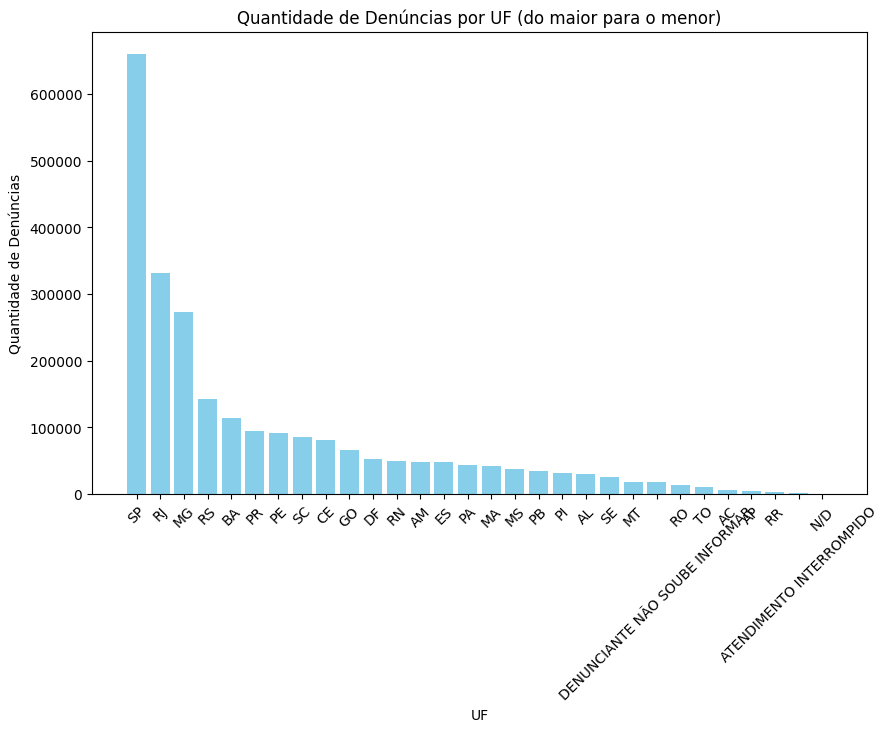

In [ ]:
denuncias_por_uf = historico_denuncias.dropna(subset=['UF', 'Município'])['UF'].value_counts().reset_index()

denuncias_por_uf.columns = ['UF', 'Quantidade de Denúncias']

denuncias_por_uf = denuncias_por_uf.sort_values(by='Quantidade de Denúncias', ascending=False)

print("Tabela com as regiões com mais denúncias (do maior para o menor):")
print(denuncias_por_uf)

plt.figure(figsize=(10, 6))
plt.bar(denuncias_por_uf['UF'], denuncias_por_uf['Quantidade de Denúncias'], color='skyblue')
plt.title('Quantidade de Denúncias por UF (do maior para o menor)')
plt.xlabel('UF')
plt.ylabel('Quantidade de Denúncias')
plt.xticks(rotation=45)
plt.show()

Esse gráfico pode revelar estados específicos onde há uma maior intolerância religiosa contra religiões afro-brasileiras, indicando áreas para campanhas de conscientização e ação pública.


Transformamos em csv para fazer o projeto no Tableau.

In [ ]:
denuncias_por_uf.to_csv('denuncias_por_uf.csv', index=False)

# **Pergunta 3: Qual é o perfil demográfico das vítimas?? Existe alguma tendência?**
Em seguida, olhamos para o perfil das vítimas: idade, gênero e raça e plotamos seus gráficos. Isso nos dá uma ideia de quais grupos estão mais vulneráveis.

In [14]:
historico_denuncias_demografia = historico_denuncias.dropna(subset=['Gênero_da_vítima', 'Faixa_etária_da_vítima', 'Raça_Cor_da_vítima'])

Denúncias por gênero:
                            Gênero_da_vítima  Quantidade de Denúncias
0                                   FEMININO                  1238512
1                                  MASCULINO                   794040
2  NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA                    93576
3                              NÃO INFORMADO                    35891
4                                  INTERSEXO                     1619


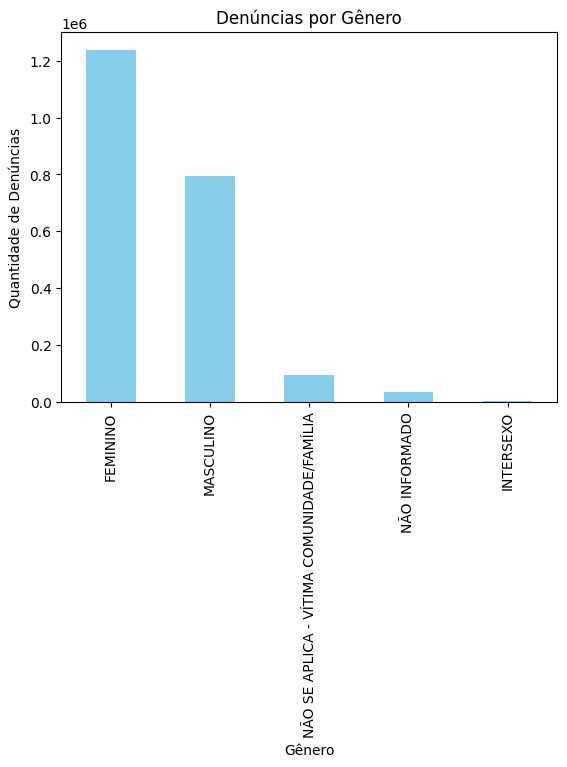

In [ ]:
denuncias_por_genero = historico_denuncias_demografia['Gênero_da_vítima'].value_counts().reset_index()
denuncias_por_genero.columns = ['Gênero_da_vítima', 'Quantidade de Denúncias']

print("Denúncias por gênero:")
print(denuncias_por_genero)

denuncias_por_genero.plot(kind='bar', x='Gênero_da_vítima', y='Quantidade de Denúncias', legend=False, color='skyblue')
plt.title('Denúncias por Gênero')
plt.ylabel('Quantidade de Denúncias')
plt.xlabel('Gênero')
plt.show()



Denúncias por raça/cor:
         Raça/Cor  Quantidade de Denúncias
0          BRANCA                   896942
1           PARDA                   764532
2   NÃO INFORMADO                   250054
3           PRETA                   236441
4         AMARELA                     8570
5        INDÍGENA                     7098
6  SEM DECLARAÇÃO                        1


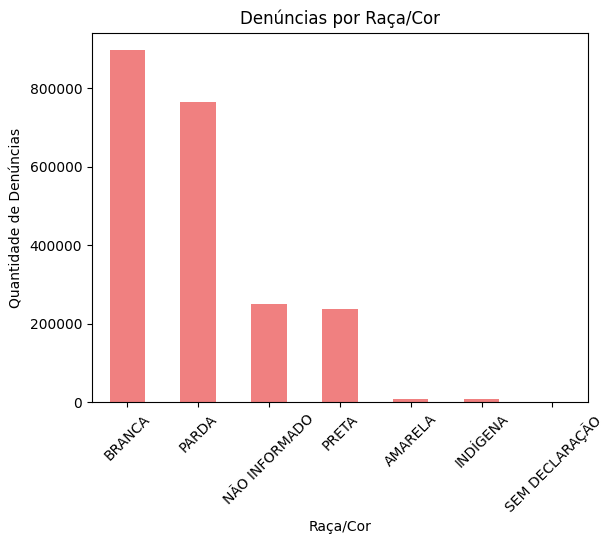

In [15]:
denuncias_por_raca = historico_denuncias_demografia['Raça_Cor_da_vítima'].value_counts().reset_index()
denuncias_por_raca.columns = ['Raça/Cor', 'Quantidade de Denúncias']

print("Denúncias por raça/cor:")
print(denuncias_por_raca)

denuncias_por_raca.plot(kind='bar', x='Raça/Cor', y='Quantidade de Denúncias', legend=False, color='lightcoral')
plt.title('Denúncias por Raça/Cor')
plt.ylabel('Quantidade de Denúncias')
plt.xlabel('Raça/Cor')
plt.xticks(rotation=45)
plt.show()


Ao entender o perfil das vítimas, conseguimos identificar quais grupos estão mais expostos à violência religiosa, permitindo ações mais direcionadas e campanhas de apoio específicas.

Ao fim, transformamos os blocos de código restantes em csv para fazer o projeto no Tableau.

In [ ]:
denuncias_por_genero.to_csv('/content/denuncias_por_genero.csv', index=False)
denuncias_por_faixa_etaria.to_csv('/content/denuncias_por_faixa_etaria.csv', index=False)
denuncias_por_raca.to_csv('/content/denuncias_por_raca.csv', index=False)

files.download('/content/denuncias_por_genero.csv')
files.download('/content/denuncias_por_faixa_etaria.csv')
files.download('/content/denuncias_por_raca.csv')

